<a href="https://colab.research.google.com/github/rakesh0929/Tomato_Leaf/blob/main/Tomato_inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3  import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Tomato/dataset/train'
valid_path = '/content/drive/MyDrive/Tomato/dataset/valid'

In [3]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inceptionv3.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/Tomato/dataset/train/*')

In [6]:
folders

['/content/drive/MyDrive/Tomato/dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Bacterial_spot']

In [7]:
x = Flatten()(inceptionv3.output)

In [8]:
len(folders)

10

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
optimizer = RMSprop(0.001) #learning rate = 0.001

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = "adam",
  metrics = ['accuracy']
)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18355 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [17]:
# fit the model
es = EarlyStopping(patience=20, restore_best_weights=True)

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=es
) 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 313s 546ms/step - loss: 1.8150 - accuracy: 0.8665 - val_loss: 2.3239 - val_accuracy: 0.8390
Epoch 2/10
574/574 [==============================] - 315s 548ms/step - loss: 1.9687 - accuracy: 0.8637 - val_loss: 3.2815 - val_accuracy: 0.8177
Epoch 3/10
574/574 [==============================] - 313s 545ms/step - loss: 1.8405 - accuracy: 0.8750 - val_loss: 4.1049 - val_accuracy: 0.8236
Epoch 4/10
574/574 [==============================] - 314s 548ms/step - loss: 1.8862 - accuracy: 0.8772 - val_loss: 2.7731 - val_accuracy: 0.8491
Epoch 5/10
574/574 [==============================] - 316s 550ms/step - loss: 1.5754 - accuracy: 0.8934 - val_loss: 4.6119 - val_accuracy: 0.7943
Epoch 6/10
574/574 [==============================] - 315s 548ms/step - loss: 1.5640 - accuracy: 0.8964 - val_loss: 2.2912 - val_accuracy: 0.8687
Epoch 7/10
574/574 [==============================] - 312s 544ms/step - loss: 1.6176 - accuracy: 0.8998 - val_loss: 2.4848 -

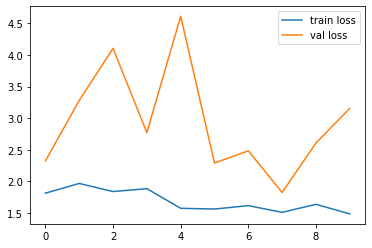

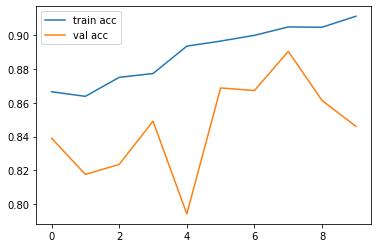

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')